Import used packages

In [1]:
import cv2
import os
import numpy as np
from algorithms import *
from IPython.display import Image

Define image path

In [2]:
image_path = './assets/low2.jpg'
file_extension = os.path.splitext(image_path)[1]
image_type = file_extension[1:].lower()

Load RGB image

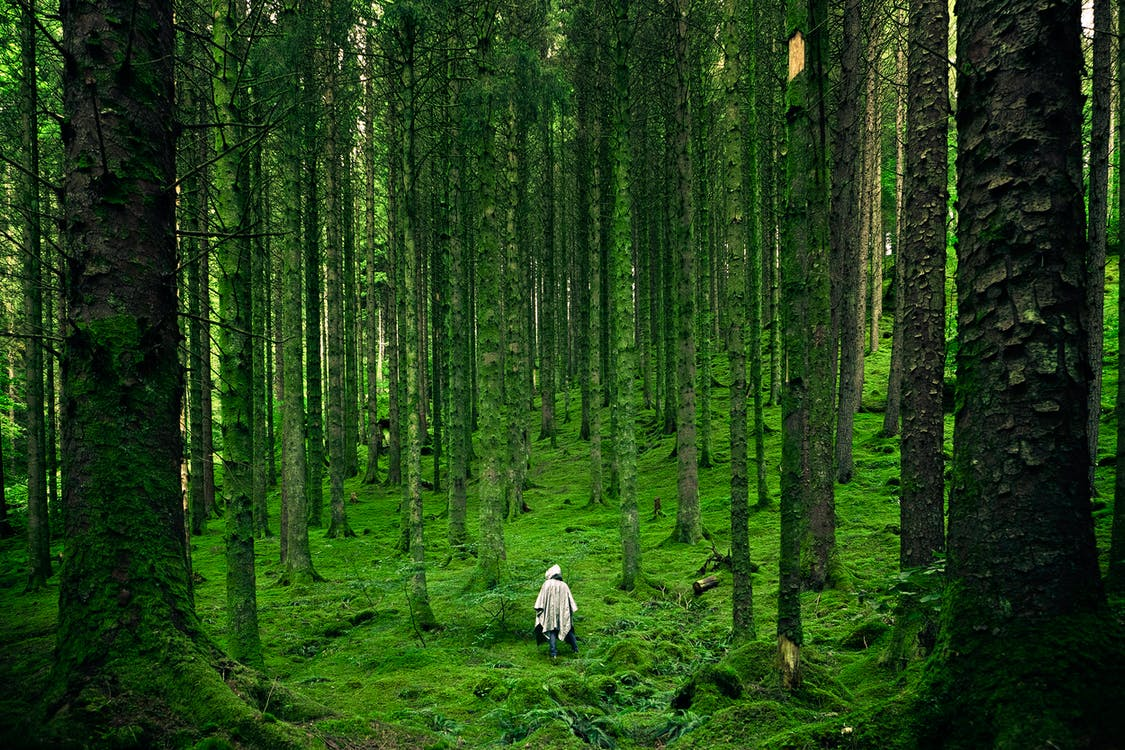

In [3]:
# Load the image in color format
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
Image(filename=image_path)

Change image to matrix

In [4]:
matrix = np.float32(img)

# Print the matrix shape
print("Matrix shape:", matrix.shape)

Matrix shape: (750, 1125, 3)


In [5]:
original_size, _ = save_image(matrix, image_type, onlySize=True)

Image size: 0.2473 mb


Split the image into three separate color channels

In [6]:
# Slice the third dimension of the array

b = matrix[:,:,0]
g = matrix[:,:,1]
r = matrix[:,:,2]

Apply SVD to each channel

In [7]:
U_b, S_b, Vt_b = svd(b)
U_g, S_g, Vt_g = svd(g)
U_r, S_r, Vt_r = svd(r)

First Approach- Choosing the best value of the number of singular values by certain percentage chosen of total energy captured

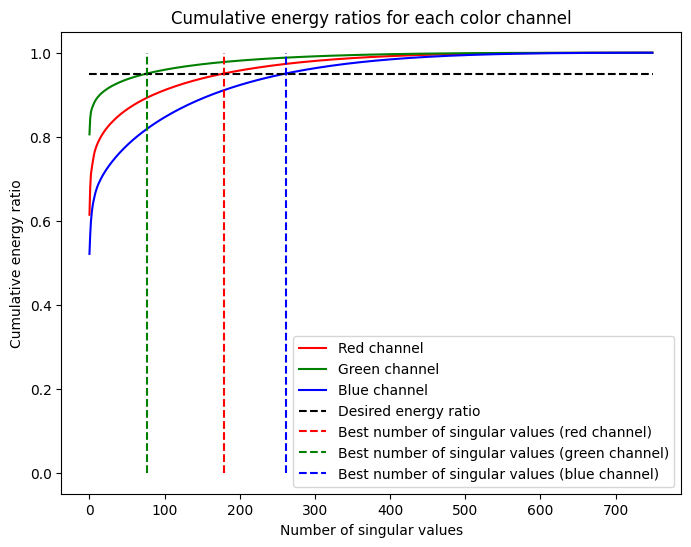

In [8]:
energy_ratio = 0.95
num_sv_r, cum_energy_r = find_num_sv(S_r, energy_ratio)
num_sv_b, cum_energy_b = find_num_sv(S_b, energy_ratio)
num_sv_g, cum_energy_g = find_num_sv(S_g, energy_ratio)
# The optimal value of number of singular values is minimum between all three channels
num_sv1 = min(num_sv_b, num_sv_g, num_sv_r)
plot_cumulative_energy(cum_energy_r, cum_energy_g, cum_energy_b, energy_ratio, num_sv_r, num_sv_g, num_sv_b, S_r)

Second Approach - Based on a set of singular values and rank

In [9]:
# Calculate the rank of the each channel
rank_b = np.linalg.matrix_rank(b)
rank_g = np.linalg.matrix_rank(g)
rank_r = np.linalg.matrix_rank(r)

# Get minimum rank among 3 channels
min_rank = min(rank_b,rank_g,rank_r)

num_sv2 = calculate_optimal_k(S_b, S_g, S_r, min_rank)

Compare both numbers of singular values

In [10]:
print("Number of singular values using first approach =",num_sv1)
print("Number of singular values using second approach =",num_sv2)

Number of singular values using first approach = 77
Number of singular values using second approach = 112


Truncate the matrices U, S, V

In [11]:
# Truncate based on num_sv1
U_b_truncate1, S_b_truncate1, Vt_b_truncate1 = truncate(U_b, S_b, Vt_b, num_sv1)
U_g_truncate1, S_g_truncate1, Vt_g_truncate1 = truncate(U_g, S_g, Vt_g, num_sv1)
U_r_truncate1, S_r_truncate1, Vt_r_truncate1 = truncate(U_r, S_r, Vt_r, num_sv1)

# Truncate based on num_sv2
U_b_truncate2, S_b_truncate2, Vt_b_truncate2 = truncate(U_b, S_b, Vt_b, num_sv2)
U_g_truncate2, S_g_truncate2, Vt_g_truncate2 = truncate(U_g, S_g, Vt_g, num_sv2)
U_r_truncate2, S_r_truncate2, Vt_r_truncate2 = truncate(U_r, S_r, Vt_r, num_sv2)

Compress Channels

In [12]:
# Compress based on num_sv1
b_compressed1 = compress(U_b_truncate1, S_b_truncate1, Vt_b_truncate1)
g_compressed1 = compress(U_g_truncate1, S_g_truncate1, Vt_g_truncate1)
r_compressed1 = compress(U_r_truncate1, S_r_truncate1, Vt_r_truncate1)

# Compress based on num_sv2
b_compressed2 = compress(U_b_truncate2, S_b_truncate2, Vt_b_truncate2)
g_compressed2 = compress(U_g_truncate2, S_g_truncate2, Vt_g_truncate2)
r_compressed2 = compress(U_r_truncate2, S_r_truncate2, Vt_r_truncate2)

Merge Channels

In [13]:
# Merge compressed array based on num_sv1
compressed_array1 = [b_compressed1, g_compressed1, r_compressed1]
merge1 = cv2.merge(compressed_array1)

# Merge compressed array based on num_sv2
compressed_array2 = [b_compressed2, g_compressed2, r_compressed2]
merge2 = cv2.merge(compressed_array2)

Save first merged matrix as an Image

Image saved in path:  compressed-images/1676667115.jpg
Image size: 0.1862 mb


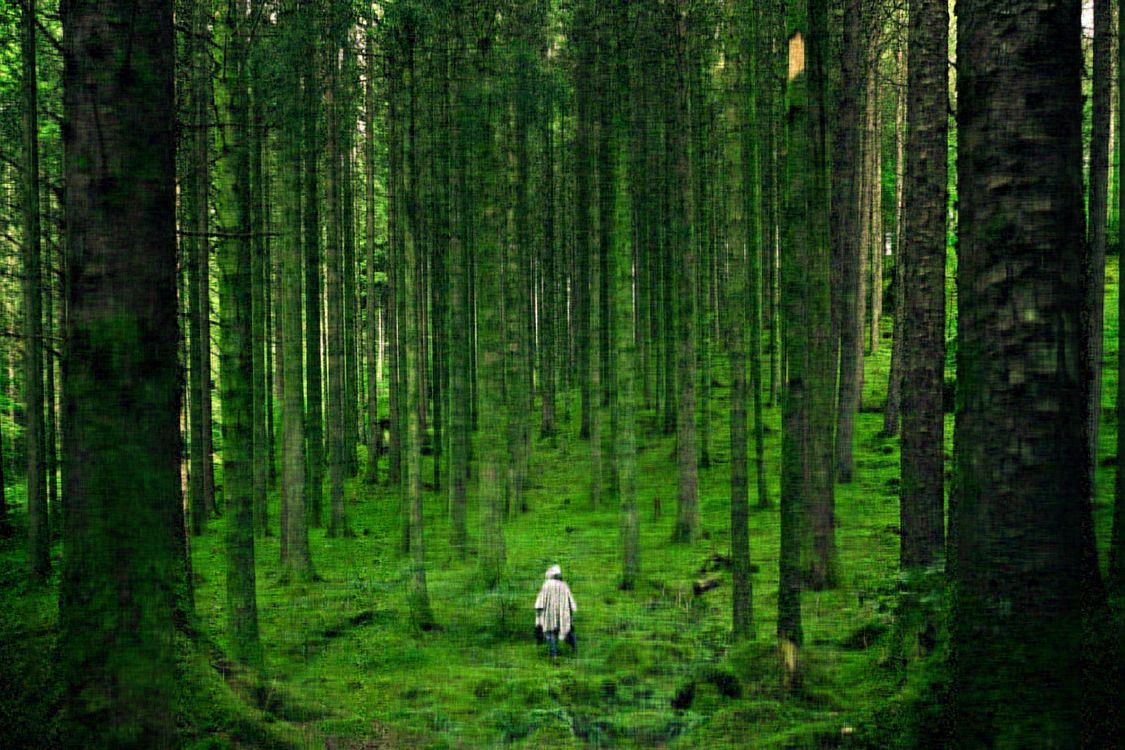

In [14]:
compressed_size1, path1 = save_image(merge1, image_type, onlySize=False)
Image(filename=path1)

Evaluation of Image 1

In [17]:
evaluate_psnr(matrix,merge1)
evaluate_ssim(matrix,merge1)

c:\Users\asus rog\Desktop\Image-Processing-SVD\algorithms\compression_evaluation.py:32: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(original_image, compressed_image,


0.5968487

Save second merged matrix as an Image

Image saved in path:  compressed-images/1676667115.jpg
Image size: 0.2038 mb


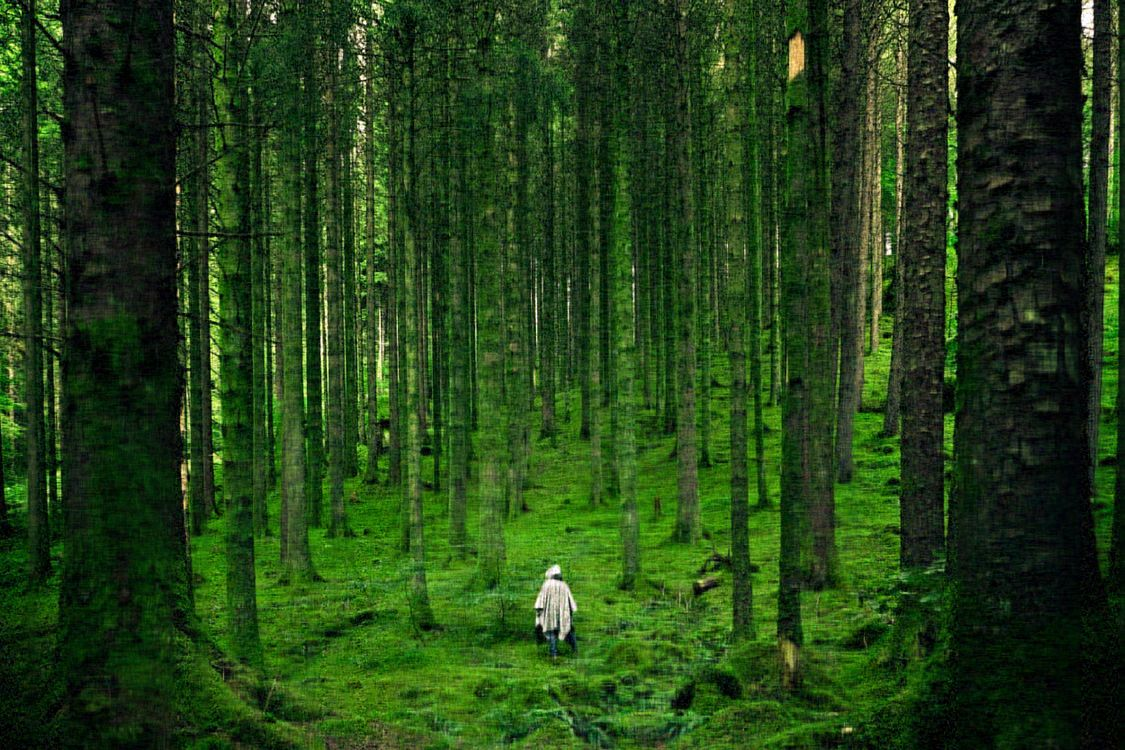

In [15]:
compressed_size2, path2 = save_image(merge2, image_type, onlySize=False)
Image(filename=path2)